In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
airbnb = pd.read_csv("input-data/airbnb.csv")

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
neighbourhood_group               13321 non-null object
neighbourhood                     13321 non-null object
latitude                          13321 non-null float64
longitude                         13321 non-null float64
room_type                         13321 non-null object
price                             13321 non-null int64
minimum_nights                    13321 non-null int64
number_of_reviews                 13321 non-null int64
reviews_per_month                 13321 non-null float64
calculated_host_listings_count    13321 non-null int64
availability_365                  13321 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [4]:
airbnb["room_type"].value_counts()

Entire home/apt    7926
Private room       5203
Shared room         192
Name: room_type, dtype: int64

In [5]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

In [7]:
strat_test_set["room_type"].value_counts() / len(strat_test_set)

Entire home/apt    0.595122
Private room       0.390619
Shared room        0.014259
Name: room_type, dtype: float64

In [8]:
airbnb = strat_train_set.copy()

In [9]:
# pasar a pipeline
q = airbnb["price"].quantile(0.98)
airbnb = airbnb[airbnb["price"] < q]

# pasar a pipeline
q = airbnb["minimum_nights"].quantile(0.9999)
airbnb = airbnb[airbnb["minimum_nights"] < q]

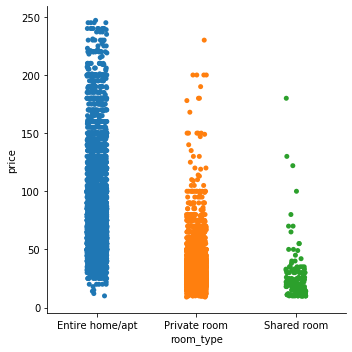

In [10]:
sns.catplot(x="room_type", y="price", data=airbnb);

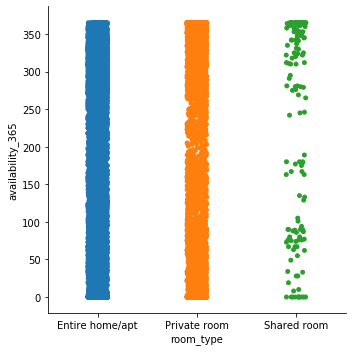

In [11]:
sns.catplot(x="room_type", y="availability_365", data=airbnb)
# sns.swarmplot(x="room_type", y="availability_365", data=airbnb)

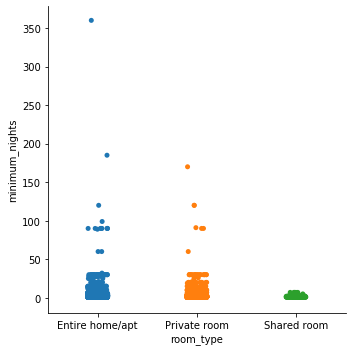

In [12]:
sns.catplot(x="room_type", y="minimum_nights", data=airbnb)

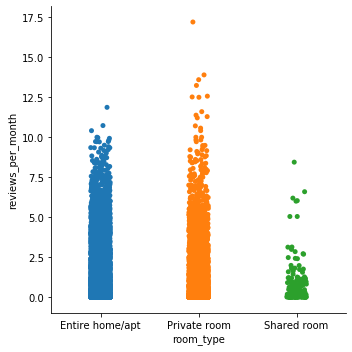

In [13]:
sns.catplot(x="room_type", y="reviews_per_month", data=airbnb)

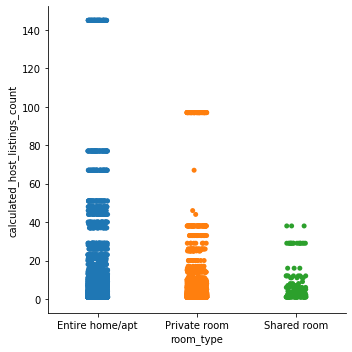

In [14]:
sns.catplot(x="room_type", y="calculated_host_listings_count", data=airbnb)

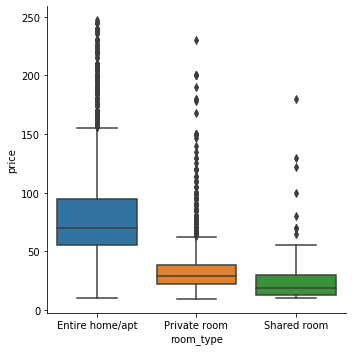

In [15]:
sns.catplot(x="room_type", y="price", kind="box", data=airbnb);

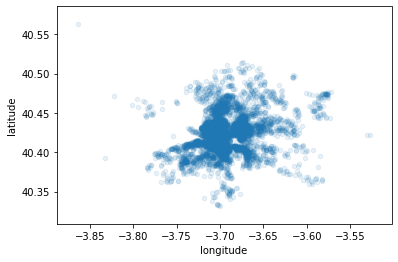

In [16]:
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

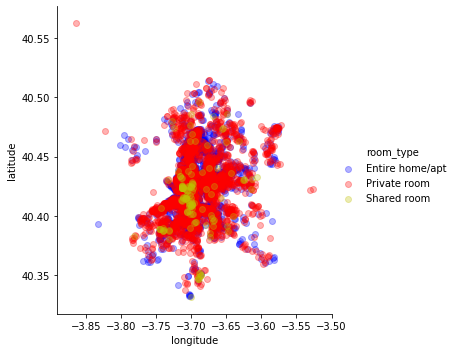

In [17]:
sns.lmplot('longitude', 'latitude', data=airbnb, hue='room_type', fit_reg=False, palette=("b", "r", "y"), scatter_kws={'alpha':0.3})
plt.show()

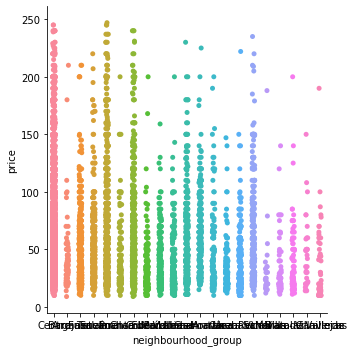

In [18]:
sns.catplot(x="neighbourhood_group", y="price", data=airbnb)

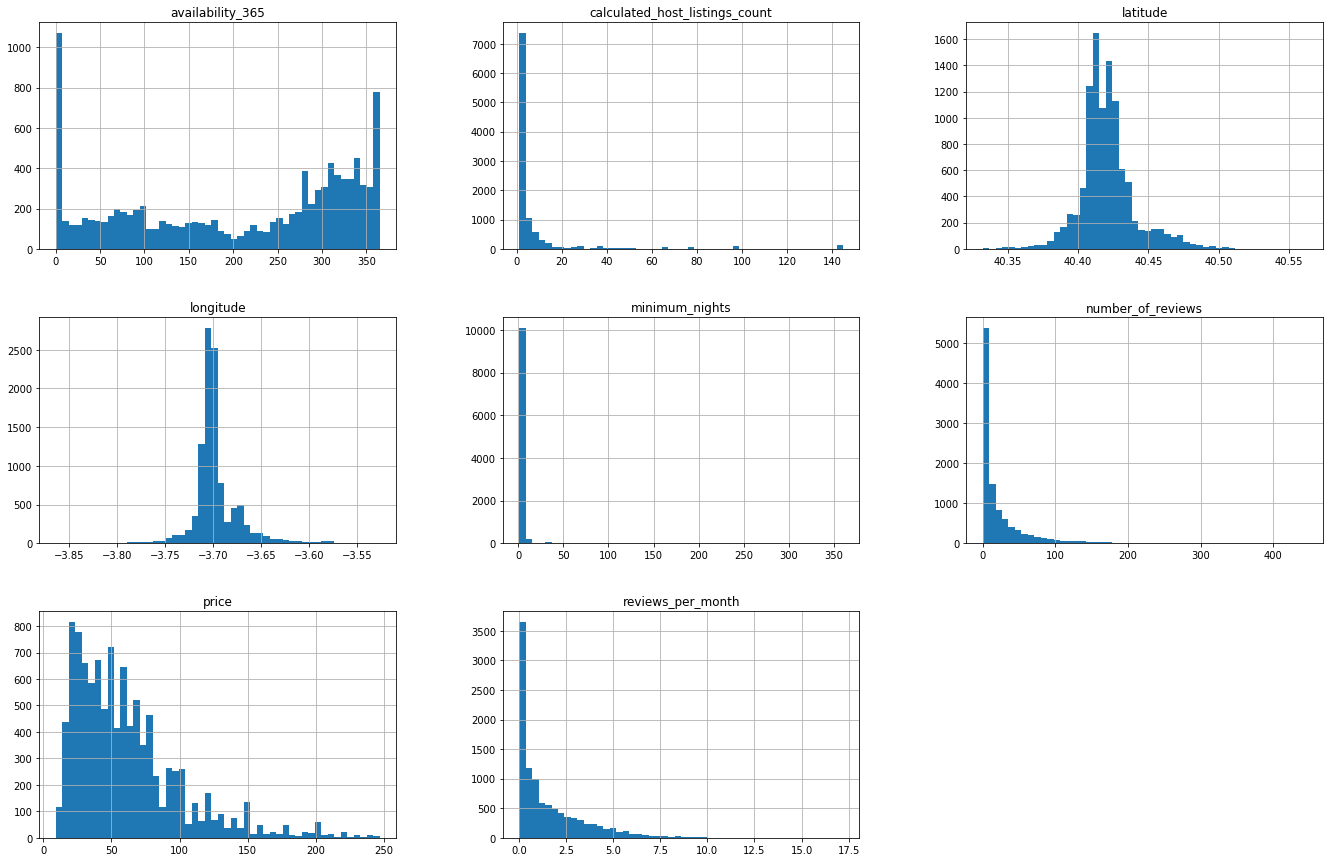

In [19]:
airbnb.hist(bins=50, figsize=(23,15))
plt.show()

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/envAAI/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/javierpiquerasmartinez/UNED/MASTER-INGENIERIA-CIENCIA-DATOS/AAI/environment/envAAI/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


In [21]:
X_train = strat_train_set
X_test = strat_test_set
y_train = X_train["room_type"]
y_test = X_test["room_type"]
X_train.drop(columns=["room_type"], inplace=True)
X_test.drop(columns=["room_type"], inplace=True)

In [22]:
X_train_transformed = X_train[["latitude","longitude","price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]]

In [23]:
X_train_transformed

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9900,40.489530,-3.648902,23.0,2.0,3.0,0.53,1.0,178.0
4554,40.421897,-3.676548,150.0,2.0,49.0,2.41,1.0,306.0
1381,40.409085,-3.704744,120.0,3.0,13.0,0.39,9.0,334.0
1531,40.409333,-3.725371,12.0,4.0,15.0,0.43,11.0,365.0
2478,40.432227,-3.711546,100.0,2.0,2.0,0.09,145.0,258.0
...,...,...,...,...,...,...,...,...
7764,40.427920,-3.705594,80.0,2.0,10.0,0.96,1.0,91.0
6626,40.413452,-3.706274,20.0,10.0,1.0,0.10,97.0,273.0
3256,40.437472,-3.693366,33.0,2.0,6.0,0.33,3.0,336.0
9465,40.413587,-3.713206,29.0,2.0,0.0,0.00,3.0,219.0


## Naive Baye's

In [24]:
model = GaussianNB()
model.fit(X_train_transformed, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_temp = model.predict(X_train_transformed)

In [ ]:
mat = confusion_matrix(y_train.array, y_temp)
mat

In [ ]:
naive_bayes_score = cross_val_score(model, X_train_transformed, y_train, cv=10)

In [ ]:
naive_bayes_score

## KNearestNeighbors

In [25]:
k = 5

knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train_transformed, y_train)

predictions = knn_model.predict(X_train_transformed)

#--Classification based on predictions--
print(np.unique(predictions, return_counts=True))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mat = confusion_matrix(y_train.array, predictions)
mat

In [ ]:
knn_score = cross_val_score(knn_model, X_train_transformed, y_train, cv=10)

In [ ]:
knn_predictions = cross_val_predict(knn_model, X_train_transformed, y_train, cv=10)

In [ ]:
knn_score

In [ ]:
mat = confusion_matrix(y_train.array, knn_predictions)
mat

## Decision Tree Classifier

In [26]:
tree_model = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=42)

tree_model.fit(X_train_transformed, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
tree_predictions = cross_val_predict(tree_model, X_train_transformed, y_train, cv=10)

In [ ]:
mat = confusion_matrix(y_train.array, tree_predictions)
mat

In [ ]:
tree_score = cross_val_score(tree_model, X_train_transformed, y_train, cv=10)

In [ ]:
tree_score

In [ ]:
tree_model.predict_proba(X_train_transformed)